# Conversion-arbitrage

Analyzing the behavior of Berkshire Hathaway's common stock class A and B to find conversion arbitrage opportunities at times of maximized spreads.

In [14]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

### Data

In [31]:
# Utility Function
def ticker_to_path(ticker, base_dir="BRK"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(ticker)))


def get_data(tickers, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in tickers:  # add SPY for reference, if absent
        tickers.insert(0, 'SPY')

    for ticker in tickers:
        df_temp = pd.read_csv(ticker_to_path(ticker), 
                              index_col="Date", 
                              parse_dates=True,
                              usecols=['Date','Adj Close'],
                       na_values=['nan'])
        
        df_temp = df_temp.rename(columns={'Adj Close': ticker})
        df = df.join(df_temp)
        if ticker == 'SPY': #Drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

# Define a date range
dates = pd.date_range('2010-01-01', '2018-10-22')

# Choose stock symbols to read
tickers = ["BRK-A","BRK-B"]

# Get stock data
df = get_data(tickers, dates)
    
df = df.dropna(how="any")

df.rename(columns={'BRK-A': 'BRK_A', 'BRK-B': 'BRK_B'}, inplace=True)

# copying data to have linear data and returns seperately
datareturns = df
datama = df

# Rate of Returns
datareturns = datareturns.pct_change(1) 

# Moving Averages for 20 days and 50 days.
for column in datama:
    for i in 20,50:
        datama["{}_MA_{}".format(column,i)] = datama[column].rolling(i).mean()

### Ratios

In [32]:
# Arbitrage (adjusted to 1500)
df['BRK_B_Adj'] = df['BRK_B'].apply(lambda x: x*1500)

# Getting rid of the NaN values.
datareturns.dropna(how='any', inplace=True)
datama.dropna(how='any', inplace=True)

# Conversion ratio (to find the spreads)
df["arbitrage_ratio"] = df["BRK_A"]/df["BRK_B_Adj"]

In [93]:
# Visualizing Moving Averages for the S&P Clean Energy Index
def moving_avs(A=True,B=False):
  
    if A is True:
        plt.figure(figsize=(16, 5))
        plt.title("BRK-A Moving Averages")
        datama.BRK_A.plot(color="#002080")
        datama.BRK_A_MA_20.plot(color="r")
        datama.BRK_A_MA_50.plot(color="r")
        plt.grid(True);
        plt.legend()
        plt.show()

    if B is True:
        plt.figure(figsize=(16, 5))
        plt.title("BRK-B Moving Averages")
        datama.BRK_B.plot(color="#33adff")
        datama.BRK_B_MA_20.plot(color="r")
        datama.BRK_B_MA_50.plot(color="r")
        plt.grid(True);
        plt.legend()
        plt.show()

def returns(A=True,B=False):

    if A is True:
        plt.figure(figsize=(16, 5))
        plt.title("BRK-A Daily Returns")
        datareturns.BRK_A.plot(color="#002080")
        datareturns.SPY.plot(color='#007CFF')
        plt.grid(True);
        plt.legend()
        plt.show()

    if B is True:
        plt.figure(figsize=(16, 5))
        plt.title("BRK-B Daily Returns")
        datareturns.BRK_B.plot(color="#33adff")
        datareturns.SPY.plot(color='#007CFF')
        plt.grid(True);
        plt.legend()
        plt.show()

def normal(A=False,B=False):

    if A is True:
        plt.figure(figsize=(16, 5))
        plt.title("BRK-A Stock Prices")
        df.BRK_A.plot(color="#002080")
        df.SPY.plot(color='#007CFF')
        plt.grid(True);
        plt.legend()
        plt.show()

    if B is True:
        plt.figure(figsize=(16, 5))
        plt.title("BRK-B Stock Prices")
        df.BRK_B.plot(color="#33adff")
        df.SPY.plot(color='#007CFF')
        plt.grid(True);
        plt.legend()
        plt.show()


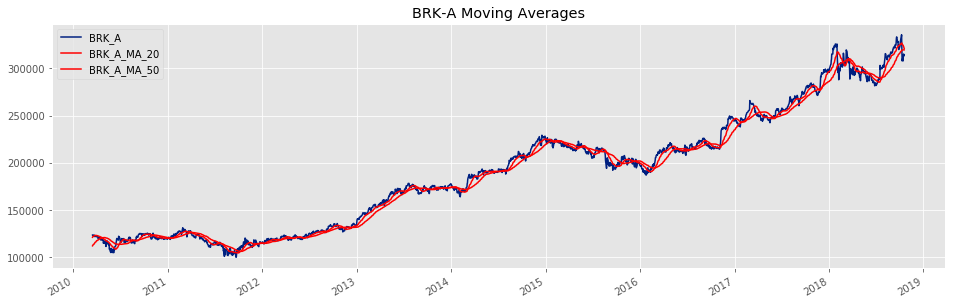

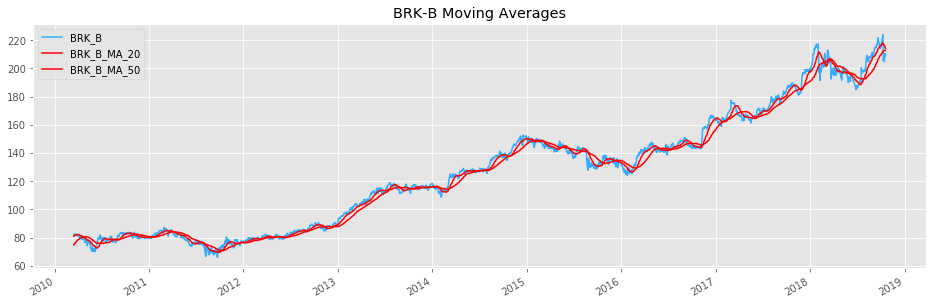

In [94]:
moving_avs(B=True)

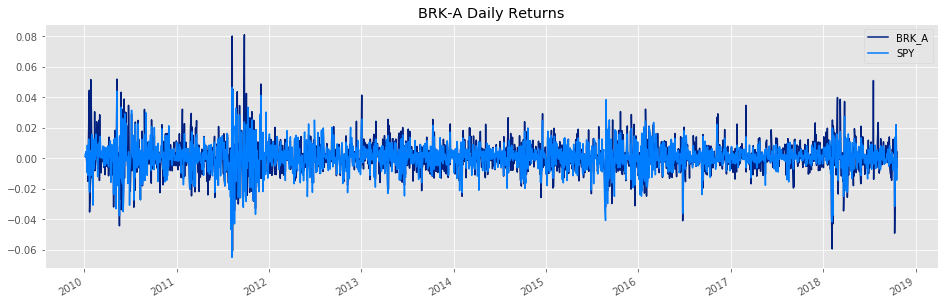

In [95]:
returns(B=False)

### Conversion Ratio

In [96]:
def spread(A=True):
  
  if A is True:
    plt.figure(figsize=(16, 5))
    plt.title("Conversion Ratio (Class A and Class B)")
    df.arbitrage_ratio.plot(color="#002080")
    plt.grid(True);
    plt.legend()
    plt.show()

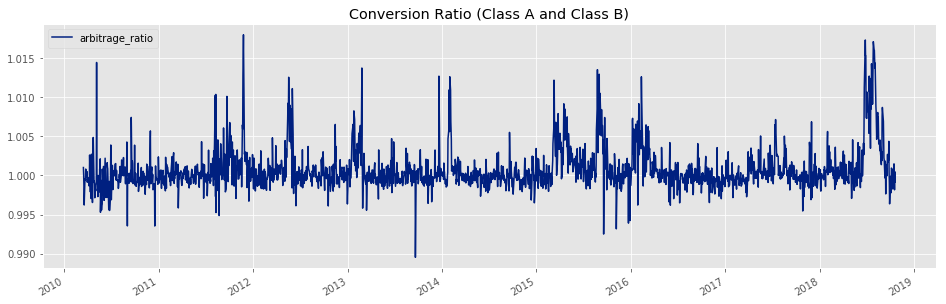

In [97]:
spread(A=True)

### Spread

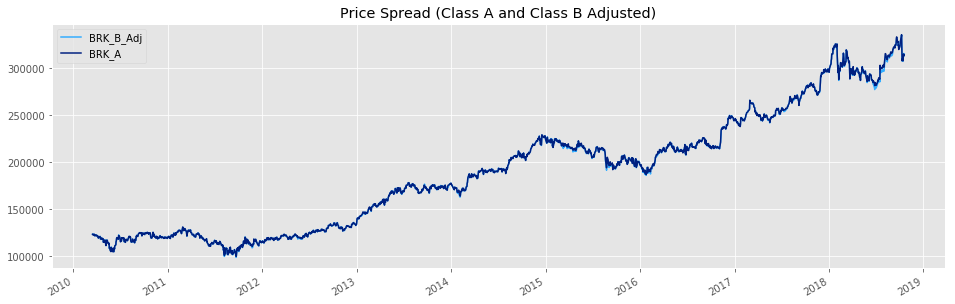

In [98]:
plt.figure(figsize=(16, 5))
plt.title("Price Spread (Class A and Class B Adjusted)")
df.BRK_B_Adj.plot(color="#33adff")
df.BRK_A.plot(color="#002080")
plt.grid(True);
plt.legend()